# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [15, 41, 86]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10253,1114,3821,397,964,412
1,19176,3065,5956,2033,2575,2802
2,22925,73498,32114,987,20070,903


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

* **Sample point 0 (Customer 15):** Overall spending all the categories are below average, except fresh. This customer spends on 'Fresh' about the average amount. Most of the spending is focused on fresh and grocery. So, this customer is a restaurant. 

* **Sample point 1 (Customer 41):** Although some of them are below the average, overall all the categories are relatively close to the average, and they are within the standard deviation. So, this customer is probably a store for typical mom-and-dad with a relatively smaller size of family. 

* **Sample point 2 (Customer 86):** The purchase of milk is the same as the max number in milk, and fresh, grocery, and detergents and paper are above the average. These characteristics might indicate a retailer. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(["Grocery"], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data["Grocery"], test_size = 0.25, random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 42).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test) 

print "Prediction score for 'Grocery' is ", score 

Prediction score for 'Grocery' is  0.681884008544


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

The feature I selected is 'Grocery'. The prediction score for that feature is 0.6819, which is relatively high score for the coefficient of determination, and it indicates that the model fits well. The high value of R^2 also indicates that the dropped feature, 'Grocery', can be derived from the rest of the features. Thus, this feature is not necessary for identifying customer's spending habits. 


In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def feature_prediction(feature):
    new_data = data.drop([feature], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size = 0.25, random_state = 42)
    regressor = DecisionTreeRegressor(random_state = 42).fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
#     print zip(new_data.columns, regressor.feature_importances_)
    return score 
    
# try all the featuers in the dataset 
for feature in data.columns.values:
    score = feature_prediction(feature)
    print ("Prediction score for {:16} = {:+.5f}".format(feature, score))


Prediction score for Fresh            = -0.38575
Prediction score for Milk             = +0.15628
Prediction score for Grocery          = +0.68188
Prediction score for Frozen           = -0.21014
Prediction score for Detergents_Paper = +0.27167
Prediction score for Delicatessen     = -2.25471


By comparing the prediction scores for the all six features, the score for ‘Grocery’ is still higher than that for the others. The prediction scores for some features such as 'Fresh', 'Frozen', and 'Delicatessen' are negative and low R^2 values, which means that these dropped features cannot be predicted from the other features. In the other words, they are unique and important features for identifying customers' spending habits. Therefore, we should keep the features: 'Fresh', 'Frozen', and 'Delicatessen'.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

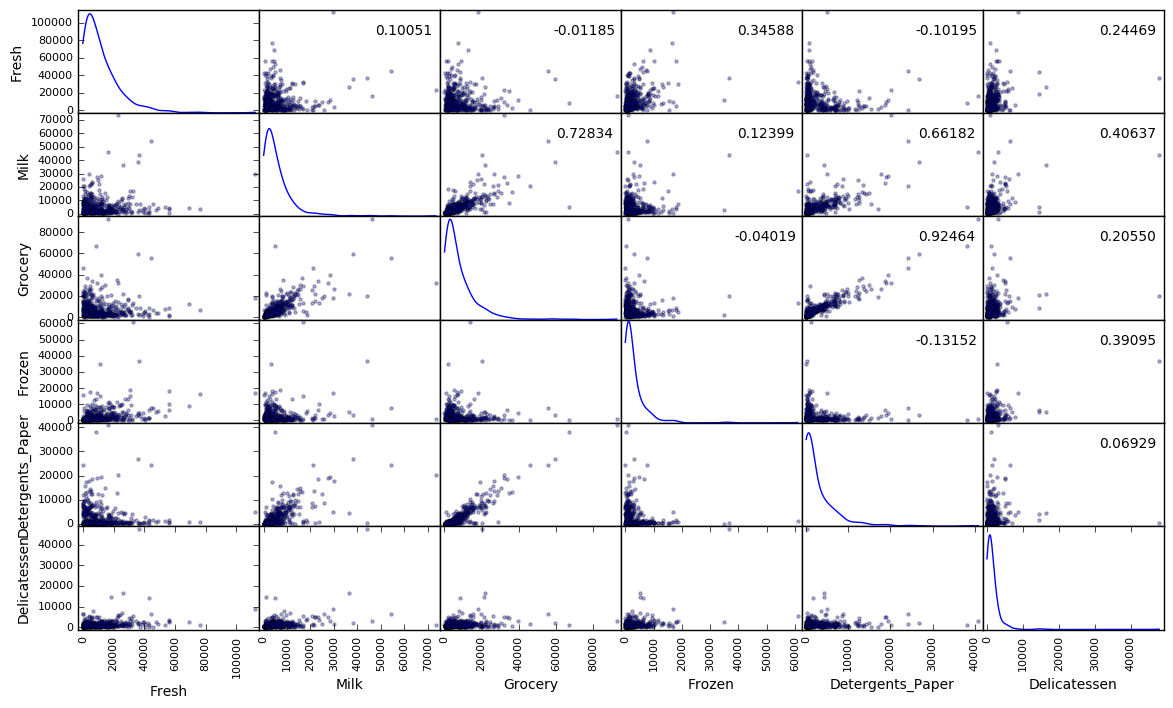

In [6]:
# Produce a scatter matrix for each pair of features in the data, with numerical correlation values 
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.5f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Based on the matrix-graph above, the pair of 'Grocery' and 'Detergents_Paper' shows high correlation (0.92464). Also, a pair of 'Milk' and 'Detergents_Paper' and a pair of 'Milk' and 'Grocery' show some degree of correlation (0.66182, 0.72834, respectively). Other pairs are almost or no correlation. This confirm my suspicions about the relevance of the feature ('Grocery'). 

If the distributions do not show the correlations, their pairs of data peak at very low values, then drop quickly. 

The distributions of all features do not look like a normal distribution. Rather, the distributions, especially a pair of 'Fresh' and 'Grocery', a pair of 'Fresh' and 'Detergents_Paper', a pair of 'Frozen' and 'Detergents_Paper' look like a Log-normal distribution. Also, the mean is above the median, which indicates that the distribution is right-skewed. 

**Reference: ** [Wikipedia: Log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution)


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

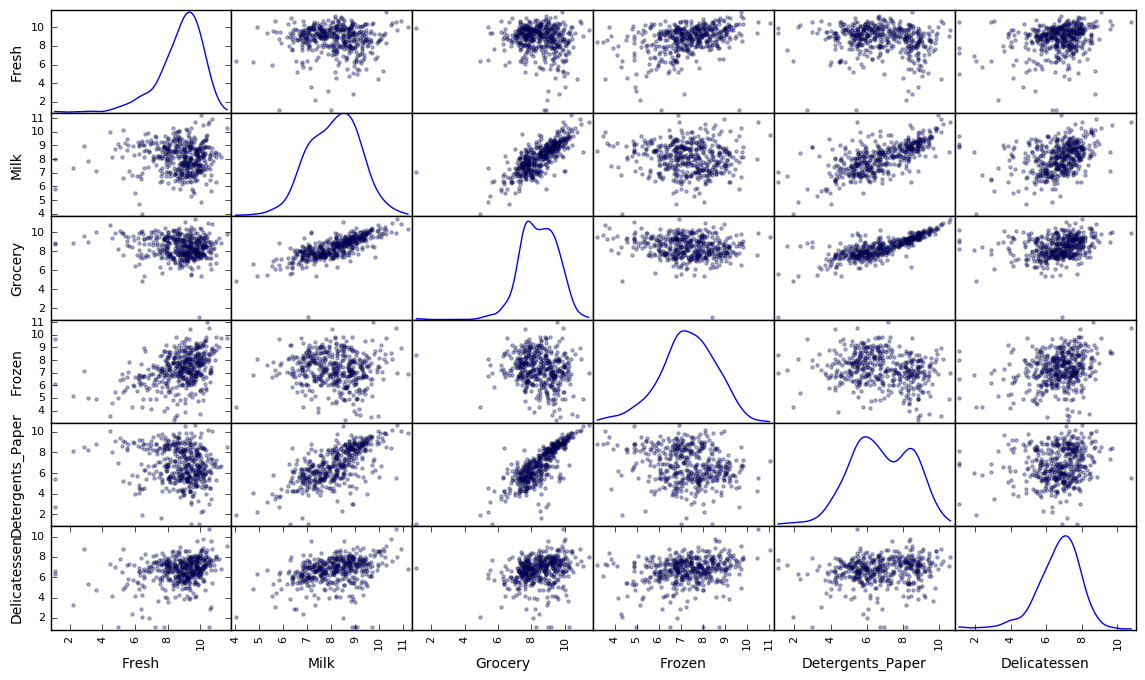

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.235326,7.015712,8.248267,5.983936,6.871091,6.021023
1,9.861415,8.027803,8.692154,7.617268,7.853605,7.938089
2,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
temp_outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlier)
    temp_outliers += (list(outlier.index))
    
    
# OPTIONAL: Select the indices for data points you wish to remove
# Add index to the outliers list if index shows up more than one feature. 
outliers  = list(set([index for index in temp_outliers if temp_outliers.count(index) > 1]))
print "\nList of outliers {}".format(sorted(outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



List of outliers [65, 66, 75, 128, 154]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, there are five data points which are considered outliers for more than one features (based on Tukey's Method). The points are [65, 66, 75, 128, 154]. Outliers can happen because of human errors or inappropriately measured data points. Since the outliers are not appropriate representations of the population, they may distort calculations or models later. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

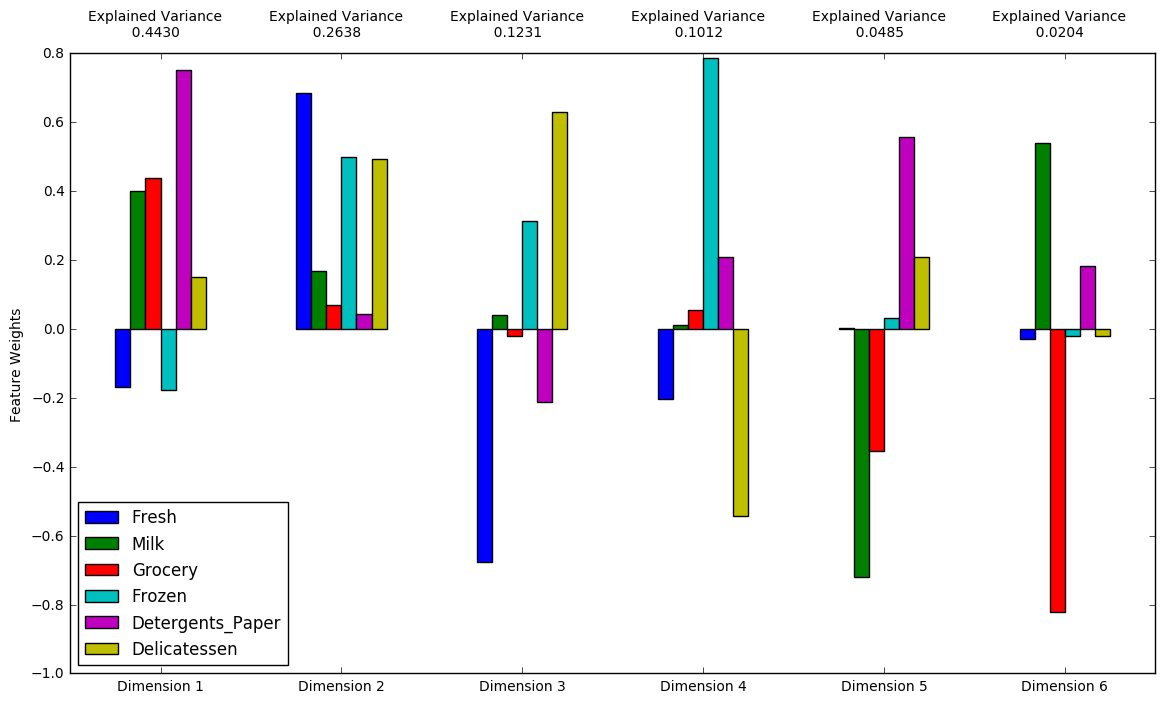

In [10]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [11]:
# Calculate the sum of Explained Variance
np.cumsum(pca.explained_variance_ratio_)

array([ 0.44302505,  0.70681723,  0.82988103,  0.93109011,  0.97959207,  1.        ])

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The variance explained by the first and second principal component is 70.68%. In the toal of the first four principal component is 93.11%. 

The principal component is interpreted based on the finding which variable is strongly correlated with each other. In the visualization above, high values of feature weights in magnitude (positive or negative) indicate that the corresponding feature heavily contributes to the component. 

Based on the visualization above: 
* **Principal component 1:** The significant positive weight is placed on 'Detergents_papr' (about 0.8) and meaningful weights are placed on 'Milk' and 'Grocery'(about 0.4). In the other words, the first principal component increases with increasing 'Detergents_papr', 'Milk', and 'Grocery'. This component would represent a customer who spend on retail goods. 

* **Principal component 2:** The significant weight is placed on 'Fresh' (about 0.7), and meaningful weights are placed on 'Frozen' and 'Delicatessen' (about 0.5). The second principal component increases with increasing 'Fresh', 'Frozen', 'Delicatessen'. This component would describe restaurants with 'delis'.

* **Principal component 3:** The significant weight is placed on 'Fresh' (about -0.7) and 'Delicatessen' (about 0.6). Some weights are placed on 'Frozen' (about 0.3). The third principal component increases with decreasing 'Fresh' and increasing 'Delicatessen' and 'Frozen'. This component would describe retailers who sell dels.

* **Principal component 4:** The significant weight is placed on 'Frozen' (about 0.8). This component increases with only one of the values, increasing 'Frozen'. This component would represent a customer who eats frozen foods almost every day (maybe living alone or busy person). 


**Reference:** [PennState: Interpretation of the Principal Components](https://onlinecourses.science.psu.edu/stat505/node/54)
 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.4258,-0.8803,-1.2189,-0.7945,0.7319,-0.3868
1,0.8046,1.5564,-0.0994,-0.4356,0.8513,-0.1148
2,4.2903,1.4952,-1.4997,0.1394,-1.1469,0.6255


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.4258,-0.8803
1,0.8046,1.5564
2,4.2903,1.4952


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**Advantages of using a K-Means clustering algorithm:**
* **Fast and relatively efficient.** K-Means runs fast. The running time of K-Means algorithm is O(nkdi) where n is the number of d-dimensional vectors, k is the number of cultures, and i is the number of iterations required until convergence. 
* **Hard assignment.** K-Means partitions a plane into regions based on the distance of points in a specific subset of the plane. Thus, each point belongs to a specific cluster. 

**Advantages of using Gaussian Mixture Model clustering algorithm (GMM)**
* **Fast.** K-Means is still faster than GMM because GMM requires to calculate and fit a quadratic number of features. However, GMM is the fastest algorithm for learning mixture models.
* **Soft assignment.** In GMM, each data point belongs to each cluster with a different degree, depending on the probability of the point generated from each cluster's normal distribution. 
* **Flexible.** Each cluster has unconstrained covariance structures, so it works rotated, elongated, and other kinds of distribution of the points. 


Since the data set is relatively small and it looks like there is no clear border between clusters, a Gaussian Mixture Model clustering algorithm probably works good. 


**Reference:**
* [Wikipedia: k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)
* [Wikipedia: Mixture model](https://en.wikipedia.org/wiki/Mixture_model)
* [Scikit-learn: Gaussian mixture models](http://scikit-learn.org/stable/modules/mixture.html)
* [Scikit-learn: Clustering](http://scikit-learn.org/stable/modules/clustering.html)


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [15]:
# Gaussian Mixture Model clustering algorithm
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

def Gaussian_Mixture(num_cluster):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components = num_cluster).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    return score, preds, centers, sample_preds, clusterer
    

In [16]:
# Try a number of clusters form 2 to 10, inclusive
best_score = -1
best_num_cluster = -1
print "num_clusters   silhouette score"
for num_cluster in range(2, 11):
    score, _, _, _, _ = Gaussian_Mixture(num_cluster)
    print "{:>12} {:>18}".format(num_cluster, score)
#     print "silhouette score with {}-clusters: {:>15}".format(num_cluster, score)
    if score > best_score:
        best_score = score
        best_num_cluster = num_cluster

print "\nBest score {} with {}-clusters".format(best_score, best_num_cluster)

num_clusters   silhouette score
           2     0.411818864386
           3     0.370684291825
           4     0.309603231034
           5     0.280983407051
           6     0.274731852371
           7     0.322542962762
           8     0.324606793003
           9     0.290088071227
          10      0.32492163559

Best score 0.411818864386 with 2-clusters


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

silhouette score with 2-clusters:   0.411818864386   
silhouette score with 3-clusters:   0.373560747175   
silhouette score with 4-clusters:   0.311063387895   
silhouette score with 5-clusters:   0.280983407051   
silhouette score with 6-clusters:   0.286075745493   
silhouette score with 7-clusters:   0.325023833619   
silhouette score with 8-clusters:   0.298431046046   
silhouette score with 9-clusters:   0.309059780258   
silhouette score with 10-clusters:  0.316497393075




Best score is 0.411818864386 with 2-clusters


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

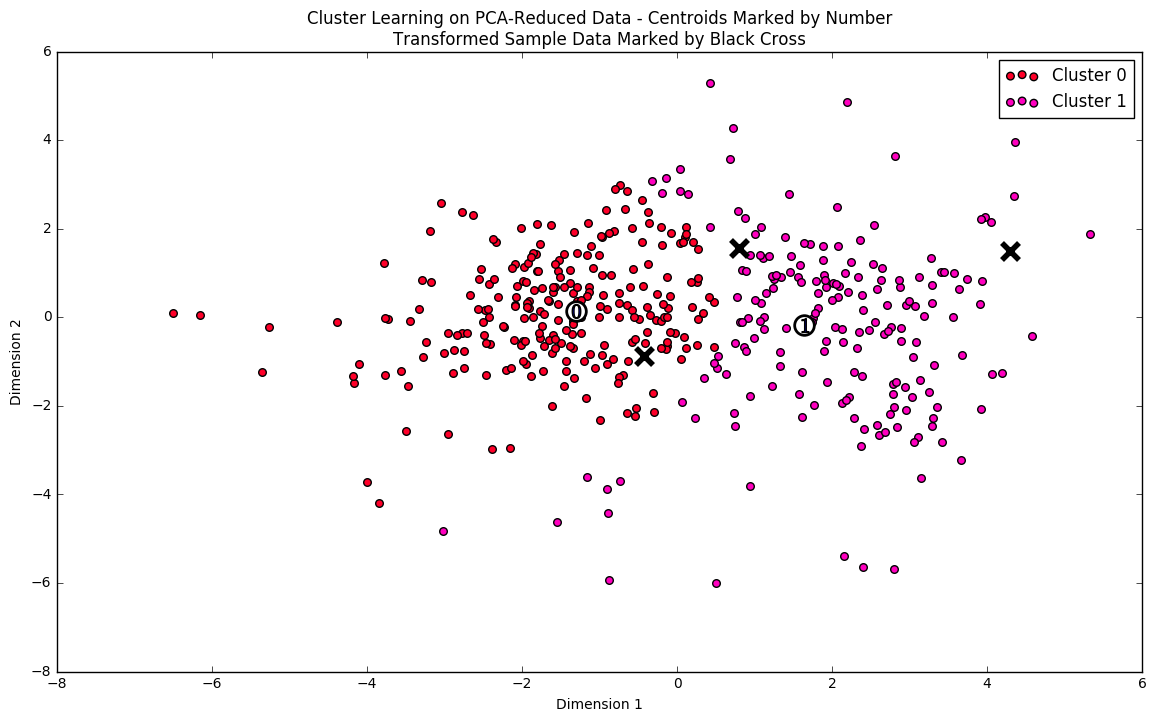

In [17]:
score, preds, centers, sample_preds, clusterer = Gaussian_Mixture(2)
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [18]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


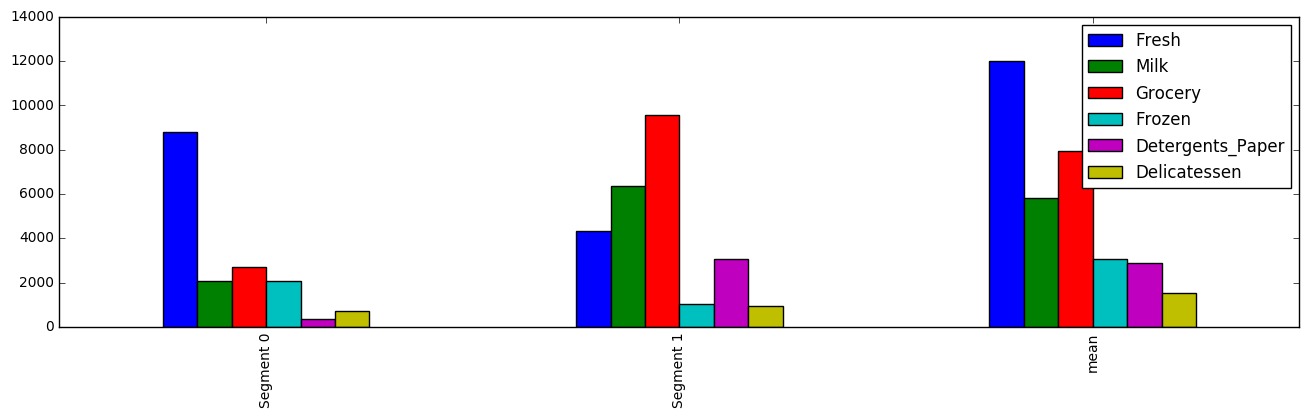

In [19]:
# Plot bar graphs with the mean values
true_centers = true_centers.append(data.describe().ix['mean'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

* **Segment 0:** This segment has above average spendings on 'Milk', 'Grocery', 'Detergents_paper'. In particular, Detergents_paper is close to 75 percentile. On the other hand, this segment has below average spendings on 'Frozen', 'Delicatessen', and 'Fresh'. Particularly, 'Frozen' and 'Delicatessen' are close to median, and 'Fresh' is close to 25 percentile. Since majority of spending is 'Fresh', 'Grocery', and 'Milk', this could be a retailer.

* **Segment 1:** Overall, its spendings on all categories are below average. In particular, Fresh is close to Median. Other categories are relatively low and lose to 25 percentile. These spending could characterize a restaurant or café.  

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [20]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

* **Sample point 0:** Overall, the values for all six categories are below average, and resemble the Cluster 1 center. 'Fresh' is about the median for both sample and the predicted cluster. The other categories are also close to 25 percentile, and so the predicted cluster seems to be consistent with the category spending on the sample.

* **Sample point 1:** The value for 'Frozen' are close to median, and the value for 'Detergents_Paper'is about 75 percentile. These characteristics resemble the Cluster 1 center. Since the values for 'Milk', 'Grocery' for the sample are below the average, the sample also has characteristics of the Cluster 2 center. By comparing the sample with the centers of the both Cluster 1 and 2 , the sample 1 seems to be similar to the both Clusters and is located on the borderline of both clusters. 

* **Sample point 2:** The values for 'Milk', 'Grocery', and 'Detergents_paper' are above average and resemble the Cluster 1 center. 'Frozen' and 'Delicatessen' are near median for both sample and predicted cluster, so the predicted cluster seems to be consistent with the category spending of the sample. 


In [21]:
# Display the probabilities for belonging to each cluste
for i,j in enumerate(pca_samples):
    print "Probability of Sample {}: {}".format(i,clusterer.predict_proba([j])[0])

Probability of Sample 0: [ 0.75817183  0.24182817]
Probability of Sample 1: [ 0.41150965  0.58849035]
Probability of Sample 2: [ 0.0057586  0.9942414]


As the probabilities indicates, for the sample 0, the probability of belonging to the cluster 1 is 0.7581, and the category spending of the sample is relatively similar to the Cluster 1 center. On the other hand, for the sample 2, the probability of belonging to the cluster 0 is 0.9942, and as described in the previous question, the values of each category are similar to the Cluster 0 center. Unlike the sample 0 and 2, for the sample 1, the probabilities of belonging to each cluster are almost similar. Since the values of each category for the sample 1 resemble to the both centers of the Cluster 1 and 2, the probabilities are also indeterministic. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**


If the wholesale distributor reduces the number of deliveries from 5 days a week to 3 days a week, in general its change affects negatively on fresh products and milk. Fresh needs to be delivered as often as possible to deliver fresh products to customers. Since customers in the segment 0 (retailers) heavily consume fresh products. Therefore, the change would negatively affect to the customers in the segment 0. On the other hand, customers in the segment 1 do not consume Fresh products. In the other words, the wholesale distributor does not need to deliver fresh products unnecessary. This might save the distributor's transportation expense. 

To find actual impacts of reducing the number of deliveries, we may need to conduct A/B tests by taking random samples from each clusters and reducing the delivery frequencies. Then, after two or three weeks, we take a customer satisfaction survey in the both control and variation groups to determine if the change affects positively or negatively. 


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

There are two different approaches:
* **Use a Gaussian mixture models.** Since we already have customer segments, we can apply them to classify each new customer to a customer segment based on the provided estimates. 
* **Use a supervised learning (SVM, naive bayes, logistic regression, etc.).** Since we engineered features and put a label on each data point, we are able to use supervised learning algorithm to learn how to distinguish new customers between the clusters. Once we created a new model, we are able to use it to classify new customers to a customer segment. 


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

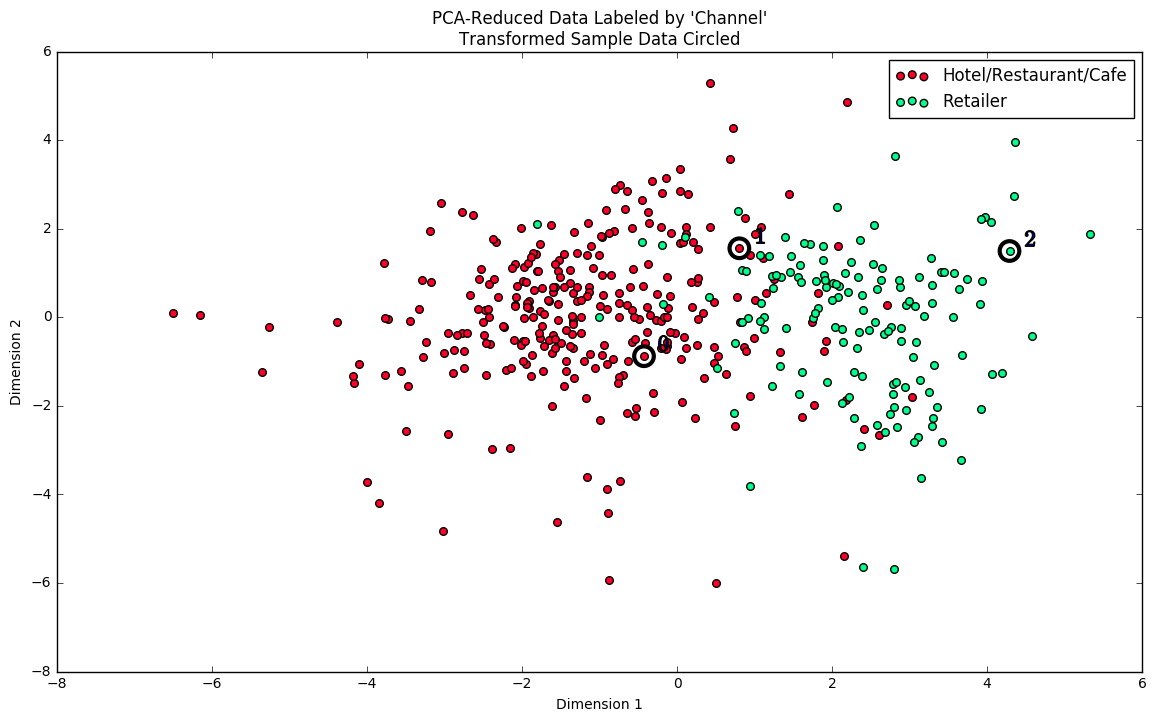

In [22]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Based on the graphs, it seems the clustering algorithm performed quite well because it classified the data into two clusters, which is consistent with this underlying distribution. Also, as I labeled the segments, the segment 0 is labeled as retailers and the segment 1 is labeled as restaurants or café. Because some data points are ambiguous, it seems that they don't purely belong to one cluster or the other, and there are overlaps in true distribution. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.